# Cross Section example using reanalysis GRIB data from CDS

Demonstrates how to use Metview to compute and plot a vertical cross section of an ERA5 GRIB file retrieved from the [Climate Data Store](https://cds.climate.copernicus.eu/) (CDS).

In [1]:
import metview as mv
import cdsapi

Retrieve ERA5 temperature data in GRIB format using the [CDS API](https://cds.climate.copernicus.eu/api-how-to) (access needs to be set up first).

In [ ]:
c = cdsapi.Client()

c.retrieve("reanalysis-era5-pressure-levels",
  {
    "variable": "temperature",
    "pressure_level":['1','2','3','5','7','10','20','30','50','70','100','150',
                      '200','250','300','400','500','600','700','800','850',
                      '900','925','950','1000'
                     ],
    "product_type": "reanalysis",
    "date": "20171231",
    "time": "00:00",
    "format": "grib"
   },
   "temp.grib")


Metview reads the GRIB data into its [Fieldset](https://confluence.ecmwf.int/display/METV/Fieldset+Functions) class.
As this is based on Macro data types, see the Macro documentation links.

In [3]:
fs = mv.read('./temp.grib')

Define a [Cross Section View](https://confluence.ecmwf.int/display/METV/Cross+Section+View), setting parameters required for the cross section computation/visualisation, including a geographical line along which a cross section of the data is computed (remember that the data consists of a number of vertical levels).

In [4]:
xsection_view = mv.mxsectview(
    vertical_scaling = "log",
    bottom_level     = 1000.0,
    top_level        = 1,
    line             = [-40, -105, 61, 85] #lat,lon,lat,lon
)

Sets up the [contouring style](https://confluence.ecmwf.int/display/METV/Contouring) which provides much flexibility in choosing how to display the output data. It controls features such as isolines, shading and colour schemes.

In [5]:
shading = mv.mcont(
    legend                         = "on",
    contour                        = "off",
    contour_level_count            = 12,
    contour_label                  = "off",
    contour_shade                  = "on",
    contour_shade_method           = "area_fill",
    contour_shade_max_level_colour = "red",
    contour_shade_min_level_colour = "white"
)

To plot this, we first need to tell Metview to send the plot to Jupyter.

In [6]:
mv.setoutput('jupyter')

Plot the data into the Cross Section View with a customized contouring style.

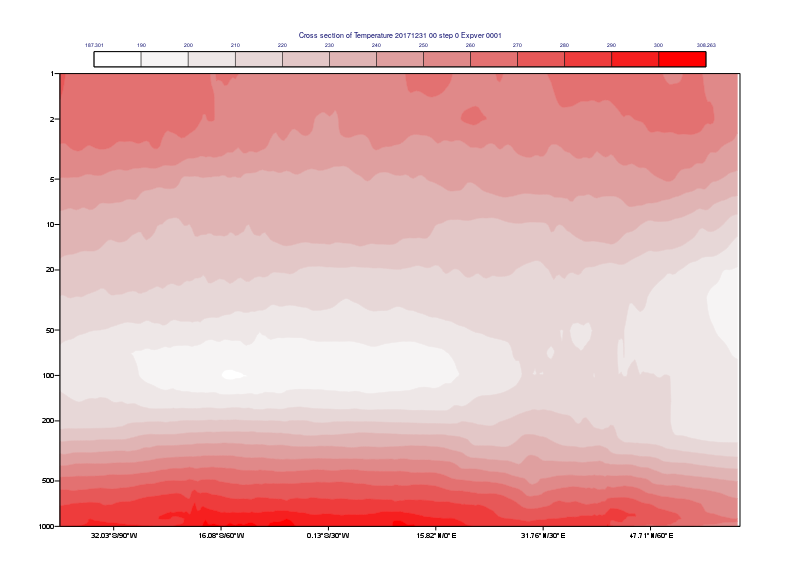

In [7]:
mv.plot(xsection_view, fs, shading)

# Additional resources

- [Introductory Metview training course](https://confluence.ecmwf.int/display/METV/Data+analysis+and+visualisation+using+Metview)
- [Metview's Python interface](https://confluence.ecmwf.int/display/METV/Metview%27s+Python+Interface)
- [Function list](https://confluence.ecmwf.int/display/METV/List+of+Operators+and+Functions)
- [Gallery examples](https://confluence.ecmwf.int/display/METV/Gallery)